In [1]:
!pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
train

,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0,72.0,0,127,1,50,1,218000.00,1.00,134,1,0,33
1,1,69.0,0,582,1,35,0,228000.00,3.50,134,1,0,30
2,0,46.0,0,719,0,40,1,263358.03,1.18,137,0,0,107
3,0,65.0,0,582,1,30,0,249000.00,1.30,136,1,1,212
4,0,45.0,0,582,1,38,1,263358.03,1.18,137,0,0,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,0,50.0,0,115,0,45,1,184000.00,0.90,134,1,1,118
187,0,70.0,0,93,0,35,0,185000.00,1.10,134,1,1,208
188,0,80.0,0,898,0,25,0,149000.00,1.10,144,1,1,87
189,0,63.0,1,103,1,35,0,179000.00,0.90,136,1,1,270


In [5]:
#filling missing values only in test, because none were found in train
for_median=['age','time','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']
for_mode=['anaemia','diabetes','high_blood_pressure','sex','smoking']
if test.isnull().values.any():
    for me in for_median:
        median = test[me].median()
        test[me].fillna(median, inplace=True)
    for mo in for_mode:
        mode = test[mo].mode()[0]
        test[mo].fillna(mode, inplace= True)

In [6]:
train.dtypes

DEATH_EVENT                   int64
age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
dtype: object

In [7]:
#changing types to match expected types 
train['age']=train['age'].astype('int64')
test['age']=test['age'].astype('int64')
train['platelets']=train['platelets'].astype('int64')
test['platelets']=test['platelets'].astype('int64')
train

,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0,72,0,127,1,50,1,218000,1.00,134,1,0,33
1,1,69,0,582,1,35,0,228000,3.50,134,1,0,30
2,0,46,0,719,0,40,1,263358,1.18,137,0,0,107
3,0,65,0,582,1,30,0,249000,1.30,136,1,1,212
4,0,45,0,582,1,38,1,263358,1.18,137,0,0,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,0,50,0,115,0,45,1,184000,0.90,134,1,1,118
187,0,70,0,93,0,35,0,185000,1.10,134,1,1,208
188,0,80,0,898,0,25,0,149000,1.10,144,1,1,87
189,0,63,1,103,1,35,0,179000,0.90,136,1,1,270


In [8]:
train.describe()

,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.00000
mean,0.298429,61.020942,0.429319,571.193717,0.408377,38.371728,0.329843,259703.895288,1.424974,136.460733,0.659686,0.308901,138.73822
std,0.458771,12.317706,0.496280,945.705300,0.492825,11.930634,0.471392,96563.511264,1.070720,4.668740,0.475060,0.463254,79.97371
min,0.000000,40.000000,0.000000,47.000000,0.000000,15.000000,0.000000,47000.000000,0.500000,113.000000,0.000000,0.000000,6.00000
25%,0.000000,51.000000,0.000000,109.500000,0.000000,30.000000,0.000000,210000.000000,0.900000,134.000000,0.000000,0.000000,75.00000
50%,0.000000,60.000000,0.000000,245.000000,0.000000,38.000000,0.000000,257000.000000,1.100000,137.000000,1.000000,0.000000,130.00000
75%,1.000000,69.500000,1.000000,582.000000,1.000000,45.000000,1.000000,296000.000000,1.400000,140.000000,1.000000,1.000000,209.00000
max,1.000000,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,742000.000000,9.000000,146.000000,1.000000,1.000000,285.00000


In [9]:
#Dividing age in strips; the higher the age the more specific the strip 
train['age']= train['age'].map(lambda x: 1 if x< 60 else x)
train['age']= train['age'].map(lambda x: 2 if (x>= 60 and x<70) else x)
train['age']= train['age'].map(lambda x: 3 if (x>= 70 and x<75) else x) 
train['age']= train['age'].map(lambda x: 4 if (x>= 75 and x<80) else x) 
train['age']= train['age'].map(lambda x: 5 if (x>= 80 and x<85) else x) 
train['age']= train['age'].map(lambda x: 6 if (x>= 85 and x<90) else x) 
train['age']= train['age'].map(lambda x: 7 if x>=90 else x) 
test['age']= test['age'].map(lambda x: 1 if  x< 60 else x)
test['age']= test['age'].map(lambda x: 2 if (x>= 60 and x<70) else x)
test['age']= test['age'].map(lambda x: 3 if (x>= 70 and x<75) else x) 
test['age']= test['age'].map(lambda x: 4 if (x>= 75 and x<80) else x)
test['age']= test['age'].map(lambda x: 5 if (x>= 80 and x<85) else x) 
test['age']= test['age'].map(lambda x: 6 if (x>= 85 and x<90) else x) 
test['age']= test['age'].map(lambda x: 7 if x>=90 else x) 

In [10]:
train.describe()

,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.00000
mean,0.298429,2.136126,0.429319,571.193717,0.408377,38.371728,0.329843,259703.895288,1.424974,136.460733,0.659686,0.308901,138.73822
std,0.458771,1.480506,0.496280,945.705300,0.492825,11.930634,0.471392,96563.511264,1.070720,4.668740,0.475060,0.463254,79.97371
min,0.000000,1.000000,0.000000,47.000000,0.000000,15.000000,0.000000,47000.000000,0.500000,113.000000,0.000000,0.000000,6.00000
25%,0.000000,1.000000,0.000000,109.500000,0.000000,30.000000,0.000000,210000.000000,0.900000,134.000000,0.000000,0.000000,75.00000
50%,0.000000,2.000000,0.000000,245.000000,0.000000,38.000000,0.000000,257000.000000,1.100000,137.000000,1.000000,0.000000,130.00000
75%,1.000000,2.500000,1.000000,582.000000,1.000000,45.000000,1.000000,296000.000000,1.400000,140.000000,1.000000,1.000000,209.00000
max,1.000000,7.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,742000.000000,9.000000,146.000000,1.000000,1.000000,285.00000


In [11]:
#train target split
X_train=train.drop(['DEATH_EVENT'],axis=1)
y_train=train['DEATH_EVENT']
X_test=test.drop(['DEATH_EVENT'],axis=1)
y_test=test['DEATH_EVENT']
X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,3,0,127,1,50,1,218000,1.00,134,1,0,33
1,2,0,582,1,35,0,228000,3.50,134,1,0,30
2,1,0,719,0,40,1,263358,1.18,137,0,0,107
3,2,0,582,1,30,0,249000,1.30,136,1,1,212
4,1,0,582,1,38,1,263358,1.18,137,0,0,185
...,...,...,...,...,...,...,...,...,...,...,...,...
186,1,0,115,0,45,1,184000,0.90,134,1,1,118
187,3,0,93,0,35,0,185000,1.10,134,1,1,208
188,5,0,898,0,25,0,149000,1.10,144,1,1,87
189,2,1,103,1,35,0,179000,0.90,136,1,1,270


In [12]:
logCV=LogisticRegressionCV(random_state=10,max_iter=200)
logCV.fit(X_train,y_train)
print("\n Test Accuracy: ", (logCV.score(X_test, y_test) * 100), "%")


 Test Accuracy:  89.58333333333334 %


Text(0.5, 12.5, 'Predicted label')

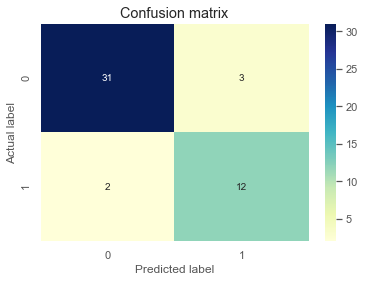

In [13]:
y_pred = logCV.predict(X_test)
                      
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Data la mole ridotta di osservazioni, ho deciso di utilizzare la LogisticRegressionCV (che effettua il training del modello su k fold stratificati, ossia nei vari split dei dati in train/validation la percentuale dei valori che può assumere la variabile target rimane costante), la quale ha provocato una diminuzione dei falsi negativi.